# Étude des graphons

## 1. Modèle

T1. 
\begin{equation*} 
X_{ij} \sim \mathcal{B}\left(\int_{[0,1]^2} W(u,v)\,du\,dv\right) 
\end{equation*}

T2.
Pas vrai en général : si $W=c\in[0,1]$, $X_{ij}$ indépendants des $U_i$, donc les $U_i$ restent indépendants conditionnellement. 
De même dès qu'on peut factoriser $W(x,y) = f(x)g(y)$ (cf calculs).

Par contre, par exemple, $W : (u_i,u_j) \mapsto \mathbb{1}_{|u_i-u_j|<\epsilon}$ corrèle fortement les $U_i$ (à montrer).

Plus finir la question.

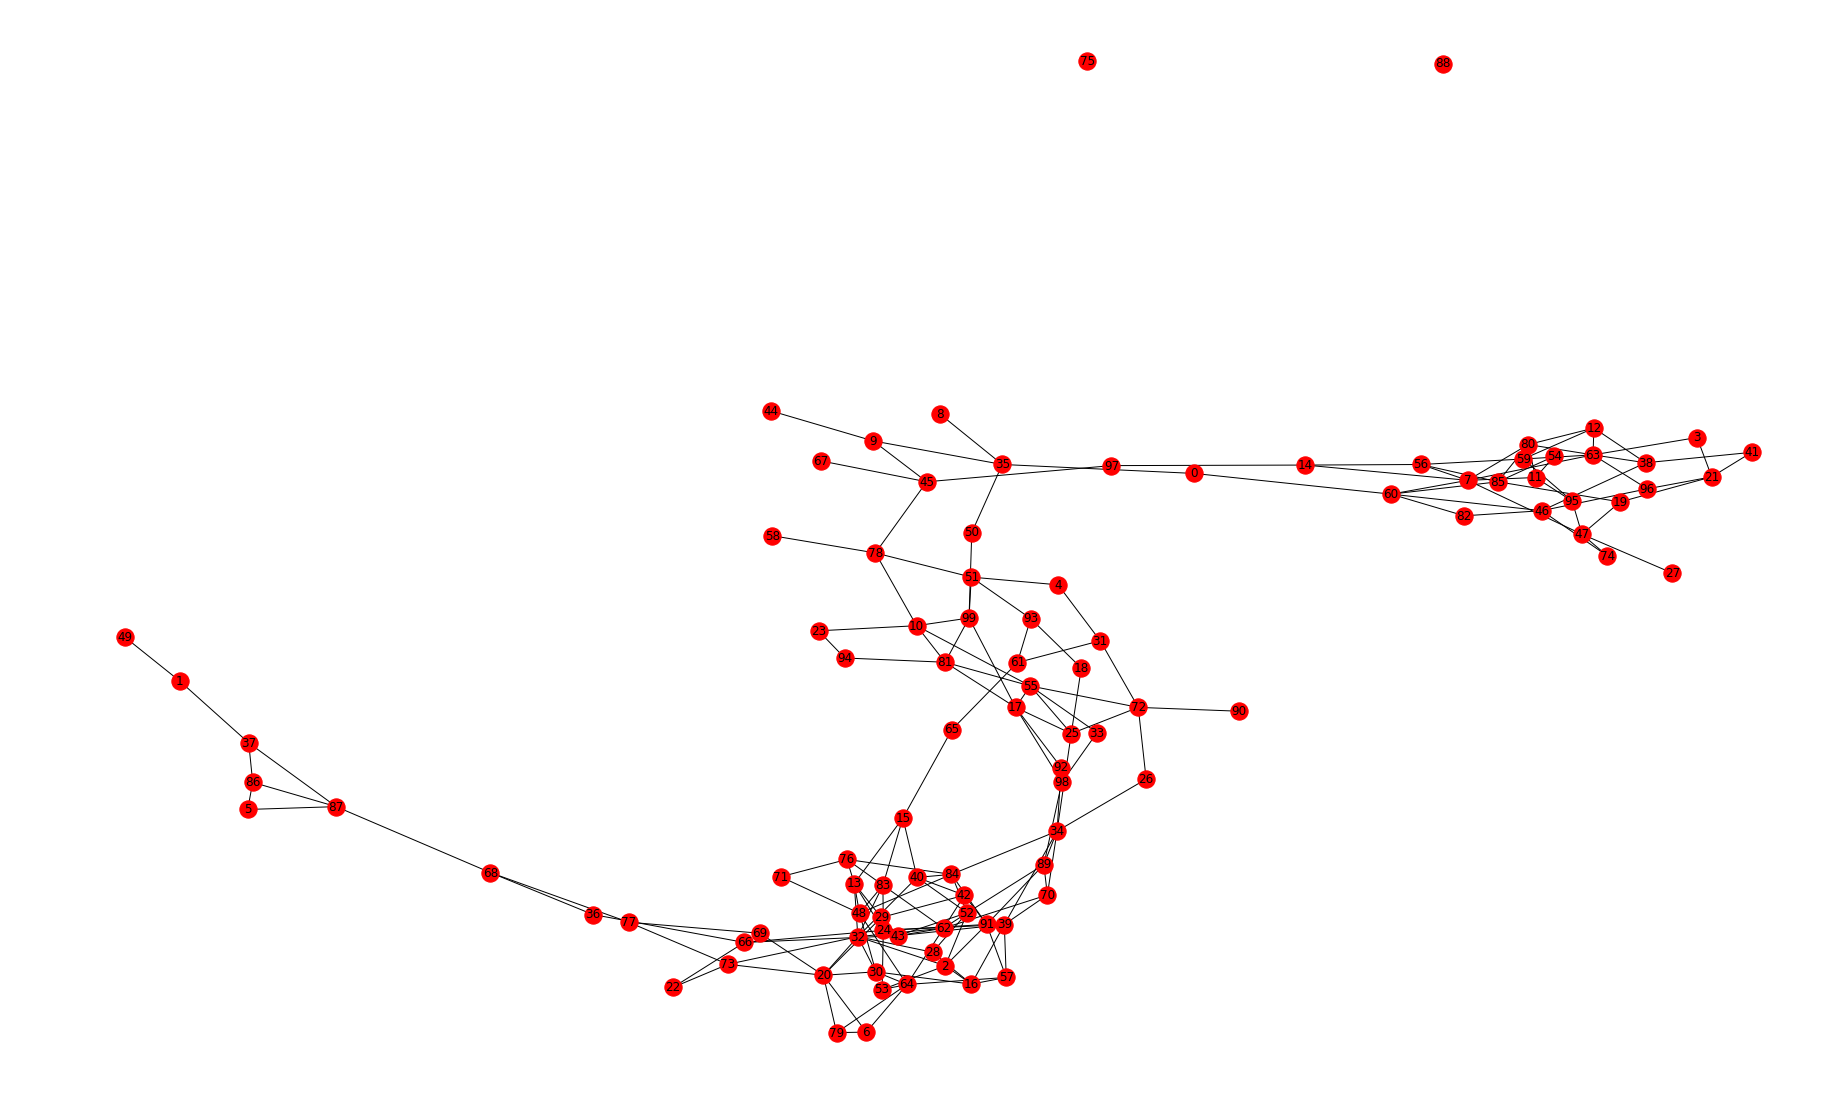

In [84]:
f=plt.figure(figsize=(25,15))
X=simu(100,lambda u,v:0.1*int(abs(u-v)<0.1))
G = nx.from_numpy_matrix(X) 
nx.draw(G, with_labels = True)
plt.show()

S1.

In [7]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import networkx as nx

In [8]:
def simu(n,W) :
    U=npr.rand(n)
    X=np.zeros((n,n))
    for i,j in it.product(range(n),repeat=2) :
        if i!=j:
            X[i,j]=npr.binomial(1,W(U[i],U[j]))
    return X

In [9]:
def W1(u,v) :
    return 1/2*int(abs(u-v)<0.3)

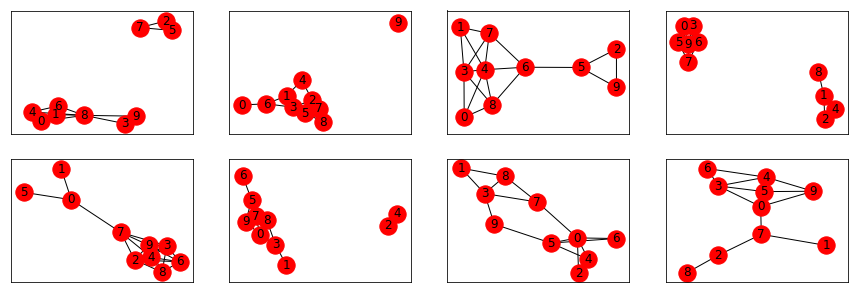

In [11]:
N=8
l=2
f=plt.figure(figsize=(15,5))
for k in range(N) :
    X=simu(10,W1)
    ax = f.add_subplot(l,N//l,k+1)
    G = nx.from_numpy_matrix(X) 
    nx.draw(G, with_labels = True)
    ax.set_axis_on()
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

T3.

En supposant que $\hat{X}$ est symétrique et que tous ses termes diagonaux sont nuls,
\begin{equation*}
\mathbb{P}(X=\hat{X} | U=\hat{U}) = \prod_{1\leq i<j \leq n} h_{\hat{X_{ij}}}(W(\hat{U_i},\hat{U_j})),
\end{equation*} où $h_0=1-id$ et $h_1 = id$.

En intégrant $\hat{U}$ sur $[0,1]^n$, on obtient la loi de X :
\begin{equation*}
\mathbb{P}(X=\hat{X}) = \int_{[0,1]^n} \left(\prod_{1\leq i<j \leq n} h_{\hat{X_{ij}}}(W(\hat{U_i},\hat{U_j}))\right)d\hat{U}
\end{equation*}

Par changement de variable, on constate que la loi de $X$ est identique pour $W$ et $f(W) := (x,y)\mapsto W(1-x,1-y)$.

T4.

Avec $n=2$, on mesure $\int_0^1 g(x)dx$, puis [...]

S2.

In [12]:
def W2(u,v) :
    return u*v

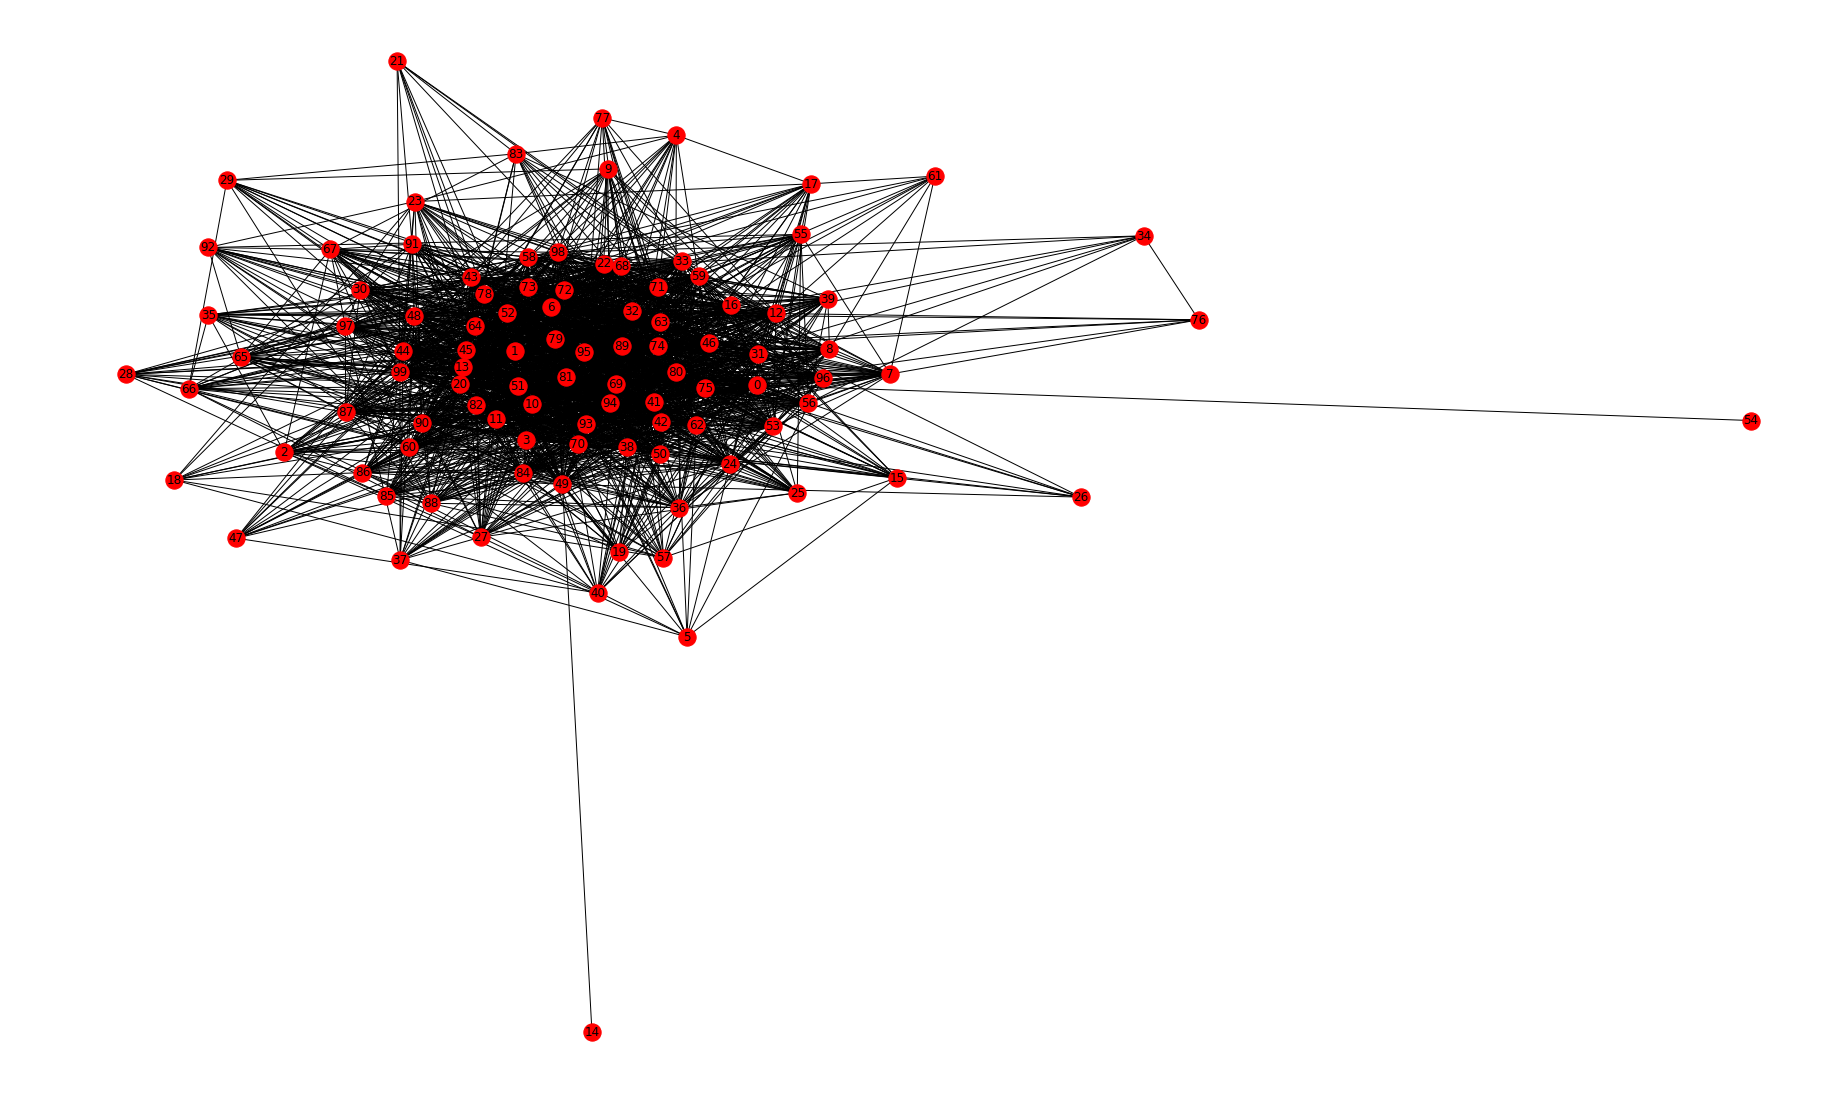

In [13]:
f=plt.figure(figsize=(25,15))
X=simu(100,W2)
G = nx.from_numpy_matrix(X) 
nx.draw(G, with_labels = True)
plt.show()

T5.
\begin{equation*}
\mathbb{E}\left[\sum_{1\leq i<j\leq  n} X_{ij}\right] = \sum_{1\leq i<j\leq  n}\mathbb{E}[X_{ij}]
= \frac{n(n-1)}{2}\mathbb{E}[X_{12}]
= \frac{n(n-1)}{2}\int_{[0,1]^2} W(u,v)\,du\,dv
\end{equation*}

Si $\int_{[0,1]^2} W(u,v)\,du\,dv=0$ (i.e. $W$ nulle p.p.), alors le graphe est vide presque sûrement, sinon l'espérance du nombre d'arête est quadratique en $n$.

[Peut-on dire qqch en général (et pas juste en espérance) ?]

S3.

In [14]:
def nbAretes(X) :
    S=0
    n=len(X)
    for i in range(n) :
        for j in range(i) :
            S+=X[i,j]
    return S

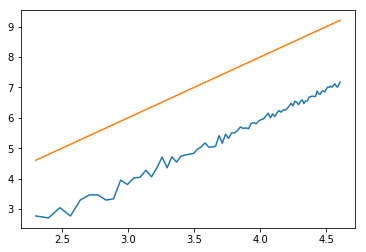

In [15]:
N=np.arange(10,101)
Y=[]
for n in N : 
    Y.append(nbAretes(simu(n,W1)))

plt.plot(np.log(N),np.log(Y))
plt.plot(np.log(N),2*np.log(N))
plt.show()

## 2. Liens avec d'autres modèles de graphes aléatoires

T6.

Il suffit de prendre $W(u,v) = p$, et l'on déduit de T1. que $\forall i\neq j,\ \mathbb{P}(X_{ij}=1)=p$.

S4.

In [70]:
def simuER(n,p) :
    return simu(n,lambda u,v:p)

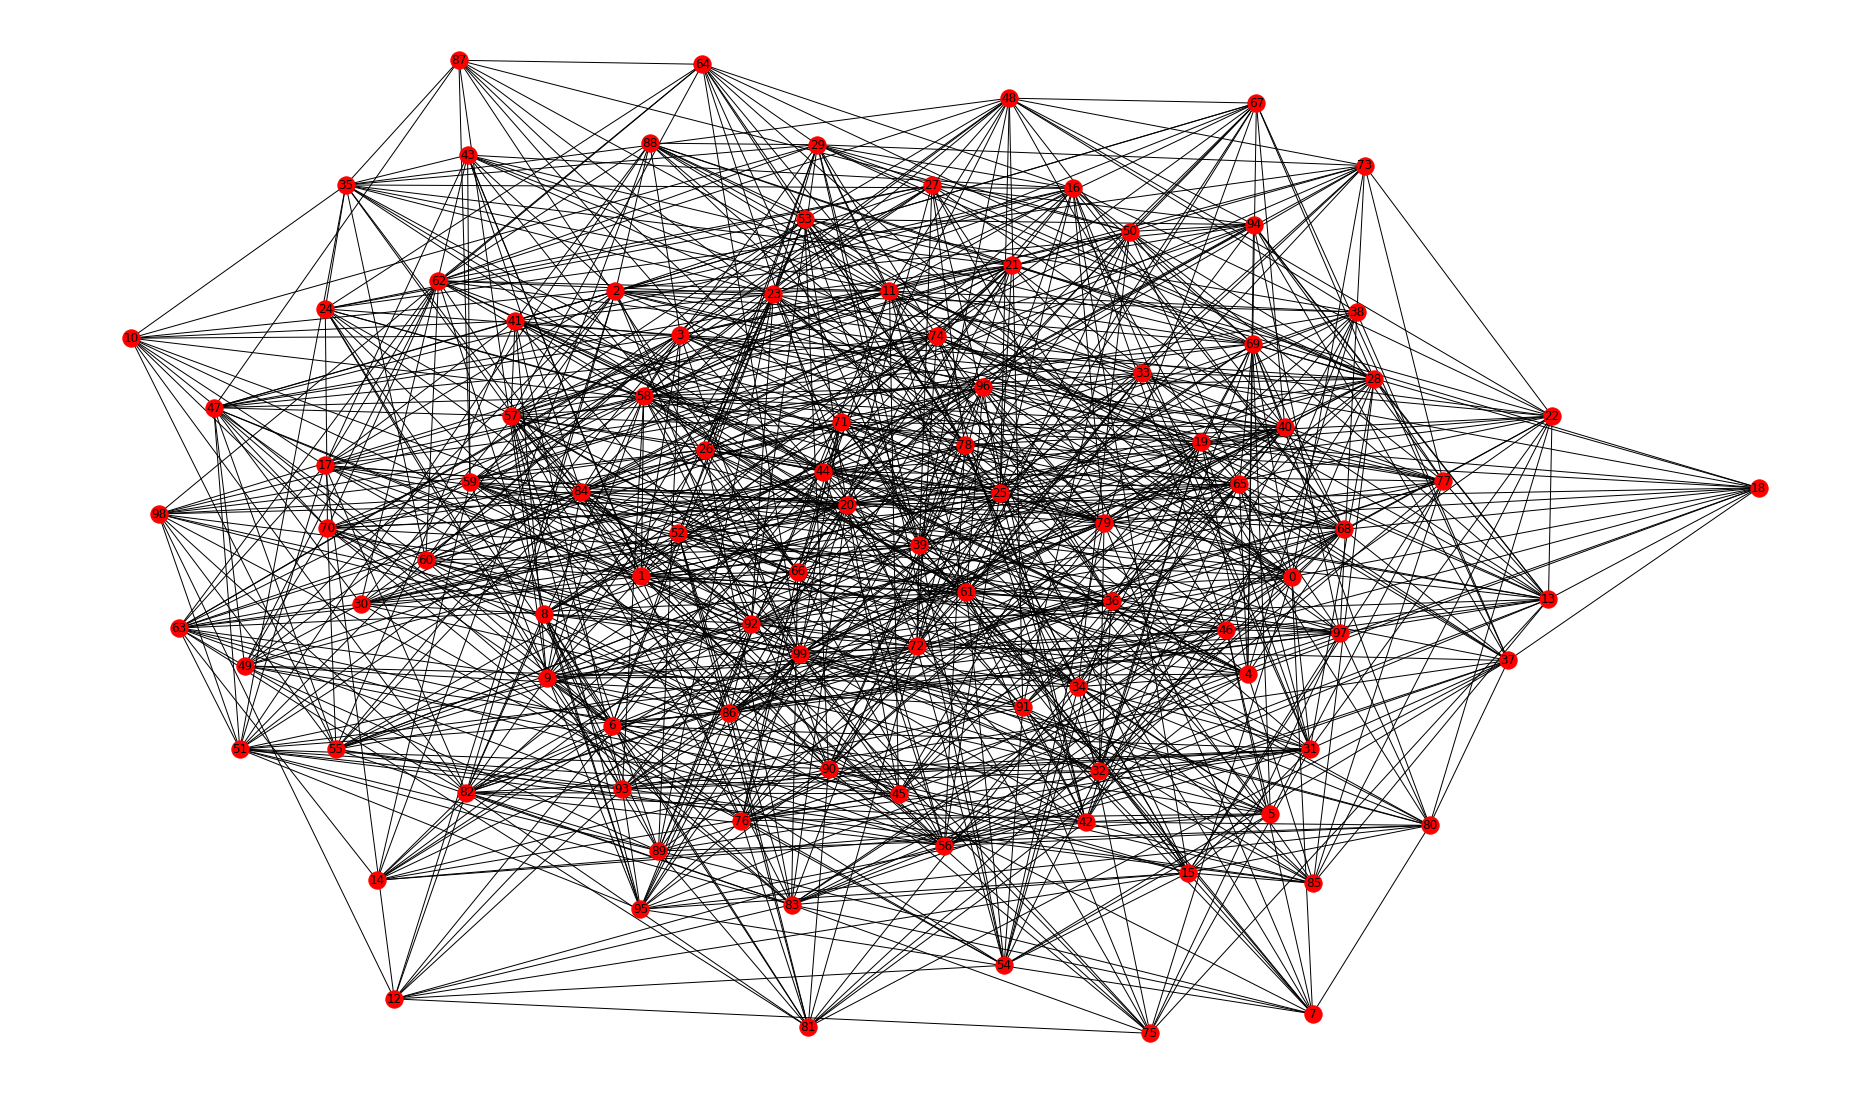

In [72]:
f=plt.figure(figsize=(25,15))
X=simuER(100,0.1)
G = nx.from_numpy_matrix(X) 
nx.draw(G, with_labels = True)
plt.show()

T7.

Il suffit de poser
\begin{equation*}
  W(x,y)=\begin{cases}
    \mu_{k,l} & \text{si $x\in[\sigma_{k-1},\sigma_k],\ y\in[\sigma_{l-1},\sigma_l]$},\\
    0 & \text{sinon.}
  \end{cases}
\end{equation*}

(On peut noter que $\mathbb{P}\left((U_i,U_j)\in[0,1]\times\{1\}\cup\{1\}\times [0,1]\right)=0$)

S5.

In [99]:
def findBloc(x,pi) :
    k,s=0,0
    while s<=x:
        s+=pi[k]
        k+=1
    return k

In [101]:
def WBlocs(pi,mu) :
    def W(x,y):
        if x==1 or y==1 :
            return 0
        k,l=findBloc(x,pi),findBloc(y,pi)
        return mu[k-1,l-1]
    return W

def simuBlocs(n,pi,mu) :
    return simu(n,WBlocs(pi,mu))

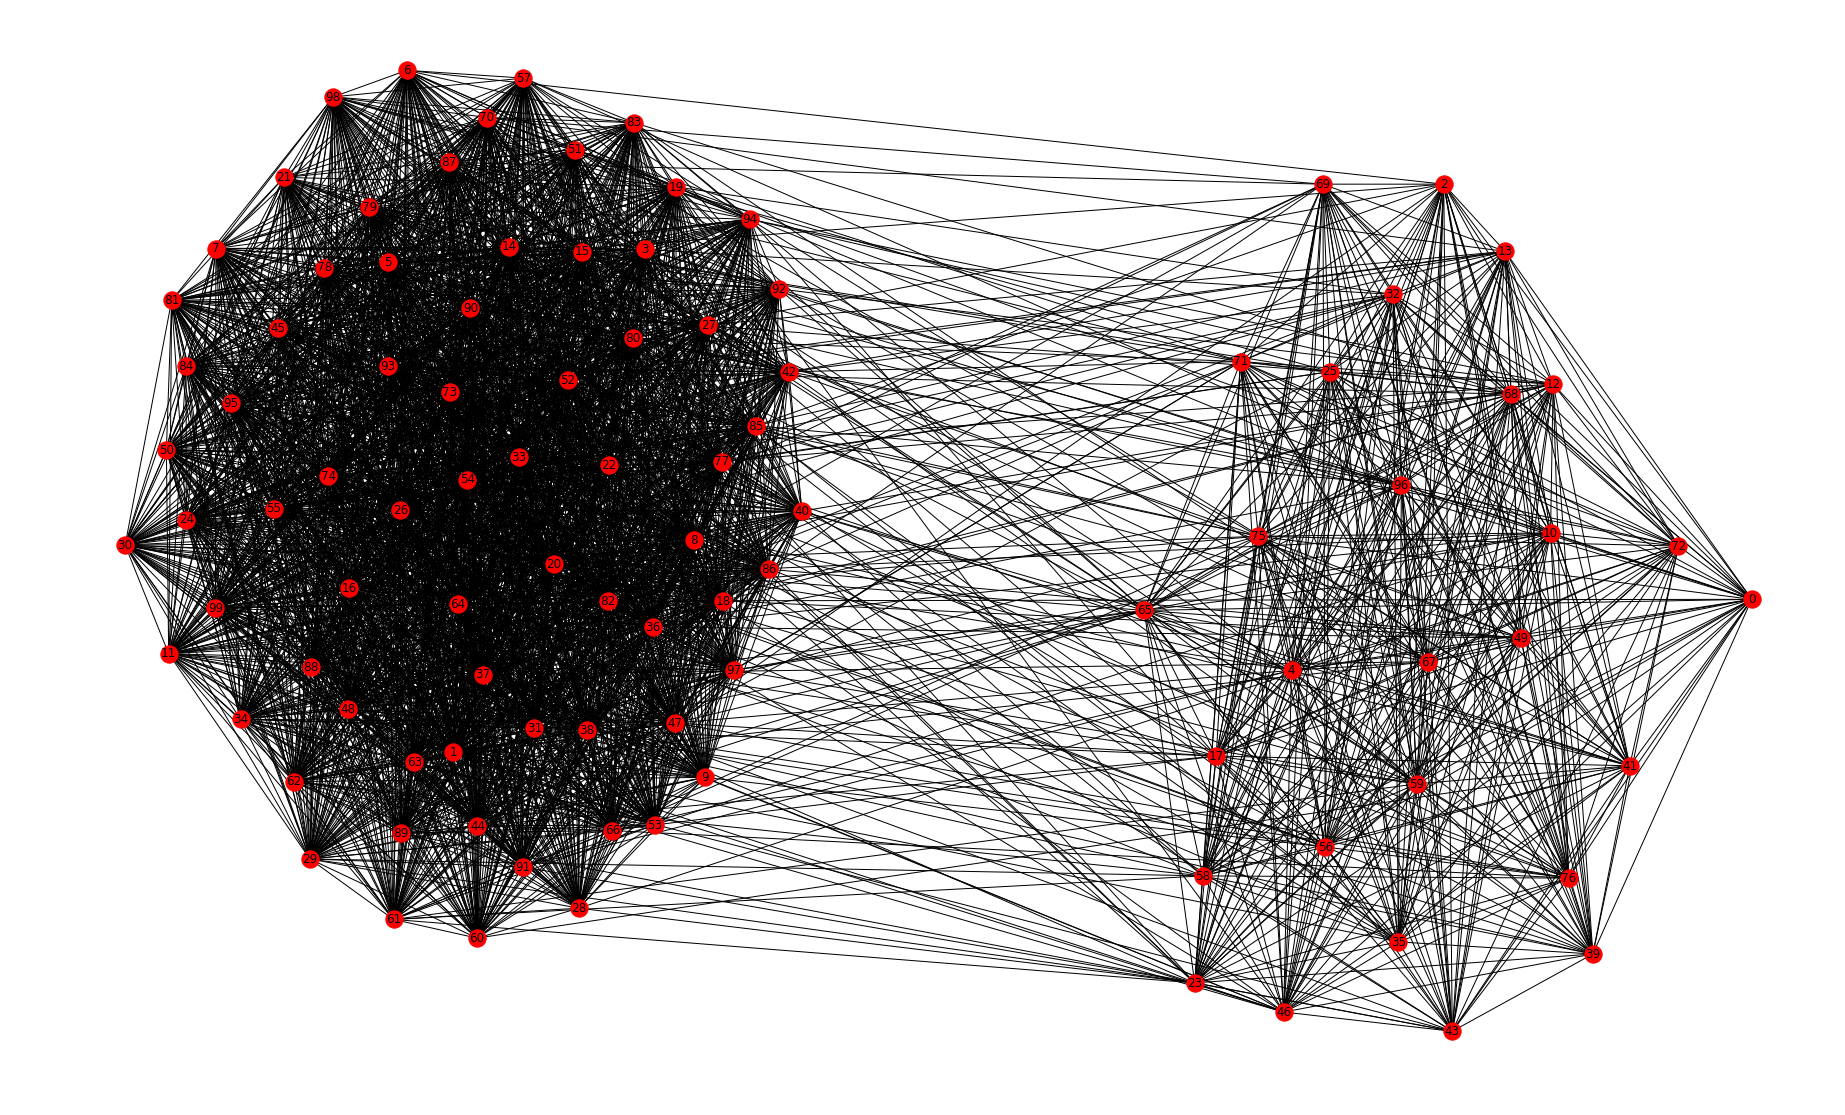

In [45]:
pi1=np.array([0.3,0.7])
mu1=np.array([[1.,0.05],[0.05,0.8]])

f=plt.figure(figsize=(25,15))
X=simuBlocs(100,pi1,mu1)
G = nx.from_numpy_matrix(X) 
nx.draw(G, with_labels = True)
plt.show()

## 3. Estimation

S6. 

S7. 

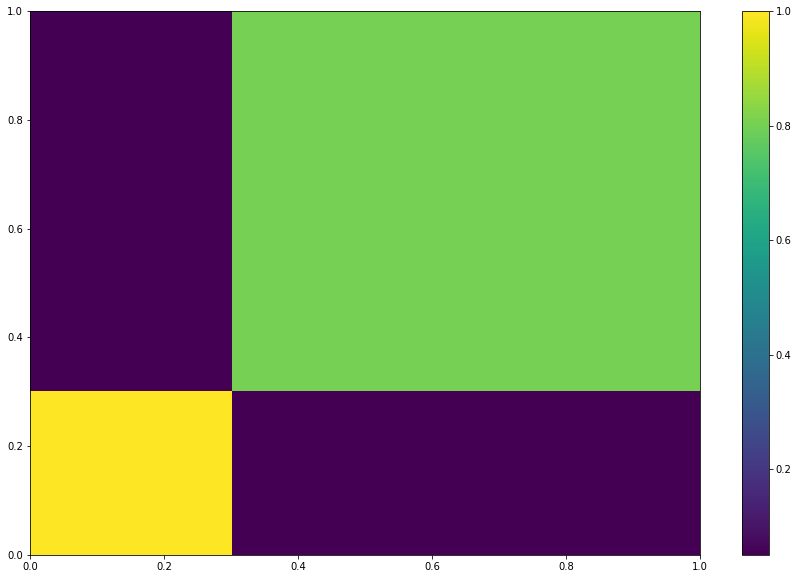

In [102]:
plt.figure(figsize=(15,10))
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
U, V = np.meshgrid(u, v)
Wb = WBlocs(pi1,mu1)
Z = np.zeros(U.shape)
for i in range(len(u)):
    for j in range(len(v)):
        Z[i,j]=Wb(U[i,j],V[i,j])
plt.pcolor(U, V, Z)
plt.colorbar()
plt.show()